In [ ]:
pip install lightgbm

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split as tts
from sklearn.metrics import mean_squared_error
from xgboost import XGBRegressor
import lightgbm as lgb

In [2]:
pd.pandas.set_option('display.max_columns', None)

In [3]:
df = pd.read_csv('predict_podcast_listening_train.csv', nrows= 20000)
df.head(50)

id     Podcast_Name Episode_Title  Episode_Length_minutes       Genre  \
0    0  Mystery Matters    Episode 98                     NaN  True Crime   
1    1    Joke Junction    Episode 26                  119.80      Comedy   
2    2   Study Sessions    Episode 16                   73.90   Education   
3    3   Digital Digest    Episode 45                   67.17  Technology   
4    4      Mind & Body    Episode 86                  110.51      Health   
5    5    Fitness First    Episode 19                   26.54      Health   
6    6   Criminal Minds    Episode 47                   69.83  True Crime   
7    7     News Roundup    Episode 44                   48.52        News   
8    8     Daily Digest    Episode 32                  105.87        News   
9    9    Music Matters    Episode 81                     NaN       Music   
10  10   Sports Central    Episode 66                  106.41      Sports   
11  11       Melody Mix    Episode 62                  107.26       Music   
12  12         Game Day    Episode 76                   82.14      Sports   
13  13      Gadget Geek    Episode 37                   92.50  Technology   
14  14      Global News    Episode 20                   81.45        News   
15  15       Tech Talks    Episode 47                   68.33  Technology   
16  16   Study Sessions    Episode 82                   78.47   Education   
17  17       Sport Spot    Episode 32                   95.45      Sports   
18  18   Digital Digest    Episode 72                    7.34  Technology   
19  19       Sport Spot    Episode 61                   51.60      Sports   
20  20      Funny Folks   Episode 100                   54.67      Comedy   
21  21    Sports Weekly   Episode 100                   67.05      Sports   
22  22  Business Briefs    Episode 54                   66.22    Business   
23  23   Digital Digest    Episode 17                   97.25  Technology   
24  24   Sports Central    Episode 36                   79.50      Sports   
25  25      Tech Trends    Episode 97                  105.35  Technology   
26  26    Sports Weekly    Episode 27                  110.70      Sports   
27  27       Innovators    Episode 31                  113.68  Technology   
28  28       Melody Mix    Episode 88                   55.66       Music   
29  29      Health Hour    Episode 38                     NaN      Health   
30  30    Comedy Corner    Episode 26                  105.46      Comedy   
31  31      Global News    Episode 92                  118.15        News   
32  32      Sound Waves    Episode 74                  117.88       Music   
33  33    Fitness First    Episode 72                   59.69      Health   
34  34   Study Sessions    Episode 30                    8.66   Education   
35  35       Sport Spot    Episode 63                   75.02      Sports   
36  36  Business Briefs    Episode 38                   12.52    Business   
37  37      Funny Folks    Episode 82                    5.83      Comedy   
38  38    Music Matters    Episode 32                   86.84       Music   
39  39      Brain Boost    Episode 67                   39.04   Education   
40  40   Sports Central    Episode 77                   69.66      Sports   
41  41         Game Day     Episode 4                   33.02      Sports   
42  42       Innovators    Episode 17                   32.29  Technology   
43  43      Funny Folks    Episode 93                     NaN      Comedy   
44  44         Game Day    Episode 24                  111.15      Sports   
45  45  Athlete's Arena     Episode 1                   11.68      Sports   
46  46      Mind & Body     Episode 2                   92.81      Health   
47  47    Wellness Wave    Episode 25                   33.23      Health   
48  48    Sports Weekly    Episode 56                   31.69      Sports   
49  49      Style Guide    Episode 75                     NaN   Lifestyle   

    Host_Popularity_percentage Publication_Day Publication_Time  \
0        

In [4]:
# df = pd.read_csv('podcast_listening_time_test.csv')
# df

In [5]:
df.drop(columns= ['id'] , inplace= True)

In [6]:
df['Episode_Sentiment'].value_counts()

Episode_Sentiment
Neutral     6772
Negative    6672
Positive    6556
Name: count, dtype: int64

In [7]:
temp = df['Genre'].value_counts()/len(df)
df['Genre'] = df['Genre'].apply(lambda x : temp[x])
df['Genre']

0        0.11305
1        0.10505
2        0.06555
3        0.11545
4        0.09805
          ...   
19995    0.10860
19996    0.11755
19997    0.09805
19998    0.08540
19999    0.11755
Name: Genre, Length: 20000, dtype: float64

In [8]:
df['Genre'] = df['Genre']*100

In [9]:
df['Genre']

0        11.305
1        10.505
2         6.555
3        11.545
4         9.805
          ...  
19995    10.860
19996    11.755
19997     9.805
19998     8.540
19999    11.755
Name: Genre, Length: 20000, dtype: float64

In [10]:
# df['Number_of_Ads'] = 
temp_ads = df['Number_of_Ads'].value_counts()/len(df)

df['Number_of_Ads'] = df['Number_of_Ads'].apply(lambda x : temp_ads[x])
df['Number_of_Ads']

0        0.28750
1        0.21205
2        0.28750
3        0.21205
4        0.20700
          ...   
19995    0.21205
19996    0.21205
19997    0.29345
19998    0.28750
19999    0.20700
Name: Number_of_Ads, Length: 20000, dtype: float64

In [13]:
df['Number_of_Ads'] = df['Number_of_Ads']*10

In [14]:
df['Number_of_Ads']

0        28.750
1        21.205
2        28.750
3        21.205
4        20.700
          ...  
19995    21.205
19996    21.205
19997    29.345
19998    28.750
19999    20.700
Name: Number_of_Ads, Length: 20000, dtype: float64

In [15]:
df['Episode_Sentiment'].value_counts()

Episode_Sentiment
Neutral     6772
Negative    6672
Positive    6556
Name: count, dtype: int64

In [16]:
df['Episode_Sentiment'] = df['Episode_Sentiment'].map({
    'Neutral' : 1,
    'Negative' : 0,
    'Positive' : 2
})

In [17]:
temp_publication_day= df['Publication_Day'].value_counts()/len(df)
df['Publication_Day'] = df['Publication_Day'].apply(lambda x : temp_publication_day[x])

In [18]:
df['Publication_Time'].value_counts()
df['Publication_Time'] = df['Publication_Time'].map({
    'Night':3,
    'Evening' : 2,
    'Afternoon' : 1,
    'Morning' : 0
})

In [19]:
df['Host_Popularity_percentage'].corr(df['Guest_Popularity_percentage'])

0.01321604216558889

In [20]:
df['Episode_Title'].nunique()

100

In [21]:
df['Episode_Title'].value_counts()

Episode_Title
Episode 64    293
Episode 31    288
Episode 81    283
Episode 23    279
Episode 69    279
             ... 
Episode 41    135
Episode 44    132
Episode 2     132
Episode 17    130
Episode 95    127
Name: count, Length: 100, dtype: int64

In [22]:
df['Podcast_Name'].value_counts()

Podcast_Name
Tech Talks             595
Fitness First          563
Sports Weekly          542
Tech Trends            533
Melody Mix             525
Business Insights      520
Game Day               508
Detective Diaries      507
Funny Folks            502
Tune Time              477
Criminal Minds         474
Lifestyle Lounge       466
Style Guide            465
Business Briefs        462
Athlete's Arena        456
Finance Focus          448
Sports Central         445
Fashion Forward        445
True Crime Stories     435
Crime Chronicles       429
Digital Digest         428
Humor Hub              423
Mystery Matters        412
Life Lessons           409
Joke Junction          405
Money Matters          401
Sport Spot             395
Wellness Wave          389
Daily Digest           388
Comedy Corner          386
Laugh Line             385
Innovators             383
Home & Living          381
Current Affairs        374
Gadget Geek            373
Mind & Body            370
Study Sessions 

In [ ]:
# df.groupby('Podcast_Name')['Listening_Time_minutes'].agg('mean')
df[df['Podcast_Name'] == "Athlete's Arena"][['Podcast_Name' , 'Listening_Time_minutes', 'Episode_Title','Host_Popularity_percentage','Guest_Popularity_percentage']].sort_values(by=['Episode_Title'])

In [23]:
df.head(50)

Podcast_Name Episode_Title  Episode_Length_minutes   Genre  \
0   Mystery Matters    Episode 98                     NaN  11.305   
1     Joke Junction    Episode 26                  119.80  10.505   
2    Study Sessions    Episode 16                   73.90   6.555   
3    Digital Digest    Episode 45                   67.17  11.545   
4       Mind & Body    Episode 86                  110.51   9.805   
5     Fitness First    Episode 19                   26.54   9.805   
6    Criminal Minds    Episode 47                   69.83  11.305   
7      News Roundup    Episode 44                   48.52   8.540   
8      Daily Digest    Episode 32                  105.87   8.540   
9     Music Matters    Episode 81                     NaN   8.310   
10   Sports Central    Episode 66                  106.41  11.755   
11       Melody Mix    Episode 62                  107.26   8.310   
12         Game Day    Episode 76                   82.14  11.755   
13      Gadget Geek    Episode 37                   92.50  11.545   
14      Global News    Episode 20                   81.45   8.540   
15       Tech Talks    Episode 47                   68.33  11.545   
16   Study Sessions    Episode 82                   78.47   6.555   
17       Sport Spot    Episode 32                   95.45  11.755   
18   Digital Digest    Episode 72                    7.34  11.545   
19       Sport Spot    Episode 61                   51.60  11.755   
20      Funny Folks   Episode 100                   54.67  10.505   
21    Sports Weekly   Episode 100                   67.05  11.755   
22  Business Briefs    Episode 54                   66.22  10.860   
23   Digital Digest    Episode 17                   97.25  11.545   
24   Sports Central    Episode 36                   79.50  11.755   
25      Tech Trends    Episode 97                  105.35  11.545   
26    Sports Weekly    Episode 27                  110.70  11.755   
27       Innovators    Episode 31                  113.68  11.545   
28       Melody Mix    Episode 88                   55.66   8.310   
29      Health Hour    Episode 38                     NaN   9.805   
30    Comedy Corner    Episode 26                  105.46  10.505   
31      Global News    Episode 92                  118.15   8.540   
32      Sound Waves    Episode 74                  117.88   8.310   
33    Fitness First    Episode 72                   59.69   9.805   
34   Study Sessions    Episode 30                    8.66   6.555   
35       Sport Spot    Episode 63                   75.02  11.755   
36  Business Briefs    Episode 38                   12.52  10.860   
37      Funny Folks    Episode 82                    5.83  10.505   
38    Music Matters    Episode 32                   86.84   8.310   
39      Brain Boost    Episode 67                   39.04   6.555   
40   Sports Central    Episode 77                   69.66  11.755   
41         Game Day     Episode 4                   33.02  11.755   
42       Innovators    Episode 17                   32.29  11.545   
43      Funny Folks    Episode 93                     NaN  10.505   
44         Game Day    Episode 24                  111.15  11.755   
45  Athlete's Arena     Episode 1                   11.68  11.755   
46      Mind & Body     Episode 2                   92.81   9.805   
47    Wellness Wave    Episode 25                   33.23   9.805   
48    Sports Weekly    Episode 56                   31.69  11.755   
49      Style Guide    Episode 75                     NaN  10.820   

    Host_Popularity_percentage  Publication_Day  Publication_Time  \
0                        74.81          0.14360                 3   
1                        66.95          0.14020                 1   
2                        69.97          0.12960                 2   
3                        57.22          0.15085                 0   
4                        80.07          0.15085                 1   
5                        48.96          0.14020                 1   
6   

In [24]:
df_backup = df.copy()


In [25]:
df =  df_backup

In [ ]:

df = pd.get_dummies(df , columns= ['Podcast_Name'], drop_first= False)
df

In [ ]:
df = pd.get_dummies(df , columns=['Episode_Title'] , drop_first= False)
df

In [ ]:
bool_cols = [col for col in df.columns if df[col].dtype == 'bool' ]
bool_cols

In [26]:
for i in bool_cols:
    df[i] = df[i].astype(int)

df

NameError: name 'bool_cols' is not defined

In [ ]:
# testing_data = pd.read_csv('podcast_listening_time_test.csv')
# df = testing_data

In [ ]:
df['Listening_Time_minutes'].plot()

In [27]:
categorical_cols = [feature for feature in df.columns if df[feature].dtype == 'object' ]
categorical_cols
# df.dtypes

['Podcast_Name', 'Episode_Title']

In [28]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
# print(label_encoder)
for feature in categorical_cols:
    df[feature] = le.fit_transform(df[feature])
df


Podcast_Name  Episode_Title  Episode_Length_minutes   Genre  \
0                34             98                     NaN  11.305   
1                24             19                  119.80  10.505   
2                40              8                   73.90   6.555   
3                10             40                   67.17  11.545   
4                31             85                  110.51   9.805   
...             ...            ...                     ...     ...   
19995            13             11                   68.38  10.860   
19996            39             49                   96.19  11.755   
19997            14             37                   49.90   9.805   
19998            47             27                     NaN   8.540   
19999            37             17                   96.52  11.755   

       Host_Popularity_percentage  Publication_Day  Publication_Time  \
0                           74.81          0.14360                 3   
1                           66.95          0.14020                 1   
2                           69.97          0.12960                 2   
3                           57.22          0.15085                 0   
4                           80.07          0.15085                 1   
...                           ...              ...               ...   
19995                       43.44          0.15085                 0   
19996                       70.21          0.15350                 2   
19997                       89.48          0.14020                 3   
19998                       60.52          0.14360                 2   
19999                       96.98          0.14190                 0   

       Guest_Popularity_percentage  Number_of_Ads  Episode_Sentiment  \
0                              NaN         28.750                  2   
1                            75.95         21.205                  0   
2                             8.97         28.750                  0   
3                            78.70         21.205                  2   
4                            58.68         20.700                  1   
...                            ...            ...                ...   
19995                          NaN         21.205                  2   
19996                          NaN         21.205                  1   
19997                        73.82         29.345                  1   
19998                        67.87         28.750                  0   
19999                         5.26         20.700                  0   

       Listening_Time_minutes  
0                    31.41998  
1                    88.01241  
2                    44.92531  
3                    46.27824  
4                    75.61031  
...                       ...  
19995                48.35468  
19996                59.63698  
19997                27.74666  
19998                38.51583  
19999                41.58542  

[20000 rows x 11 columns]

In [29]:
df.isna().sum()

Podcast_Name                      0
Episode_Title                     0
Episode_Length_minutes         2341
Genre                             0
Host_Popularity_percentage        0
Publication_Day                   0
Publication_Time                  0
Guest_Popularity_percentage    3873
Number_of_Ads                     0
Episode_Sentiment                 0
Listening_Time_minutes            0
dtype: int64

<Axes: >

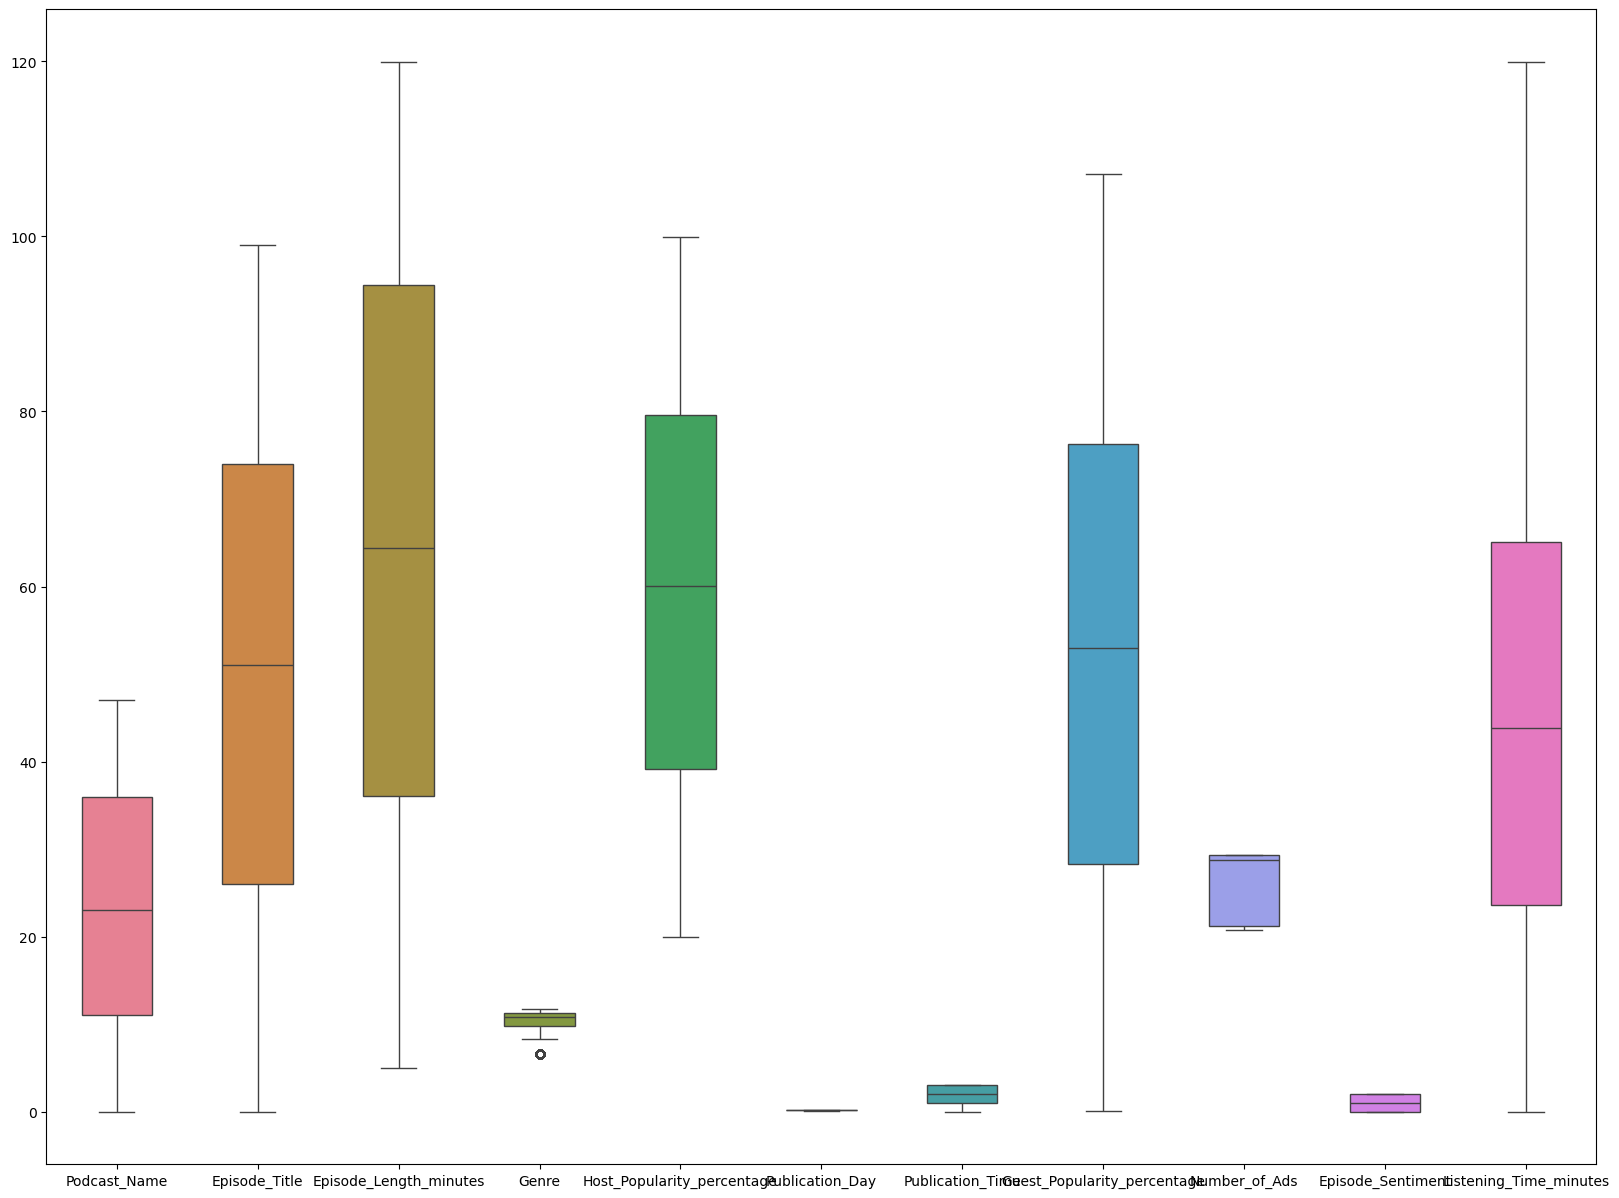

In [30]:
import seaborn as sns
plt.figure(figsize=(20,15))
sns.boxplot(df, width = 0.5)

In [31]:
df.describe()

Podcast_Name  Episode_Title  Episode_Length_minutes         Genre  \
count  20000.000000   20000.000000            17659.000000  20000.000000   
mean      23.463250      50.064650               64.841483     10.257308   
std       14.087117      28.129937               32.989497      1.464578   
min        0.000000       0.000000                5.000064      6.555000   
25%       11.000000      26.000000               36.055000      9.805000   
50%       23.000000      51.000000               64.380000     10.820000   
75%       36.000000      74.000000               94.440000     11.305000   
max       47.000000      99.000000              119.970000     11.755000   

       Host_Popularity_percentage  Publication_Day  Publication_Time  \
count                20000.000000     20000.000000      20000.000000   
mean                    59.829026         0.143225          1.556350   
std                     23.028078         0.007194          1.112424   
min                     20.000000         0.129600          0.000000   
25%                     39.200000         0.140200          1.000000   
50%                     60.040000         0.141900          2.000000   
75%                     79.590000         0.150850          3.000000   
max                     99.990000         0.153500          3.000000   

       Guest_Popularity_percentage  Number_of_Ads  Episode_Sentiment  \
count                 16127.000000   20000.000000       20000.000000   
mean                     51.994861      25.658335           0.994200   
std                      28.395906       4.003972           0.813265   
min                       0.030000      20.700000           0.000000   
25%                      28.275000      21.205000           0.000000   
50%                      52.990000      28.750000           1.000000   
75%                      76.330000      29.345000           2.000000   
max                     107.080000      29.345000           2.000000   

       Listening_Time_minutes  
count            20000.000000  
mean                45.768273  
std                 27.157087  
min                  0.000000  
25%                 23.652810  
50%                 43.879880  
75%                 65.042055  
max                119.970000

In [32]:
df[df['Host_Popularity_percentage'] > 100]

Empty DataFrame
Columns: [Podcast_Name, Episode_Title, Episode_Length_minutes, Genre, Host_Popularity_percentage, Publication_Day, Publication_Time, Guest_Popularity_percentage, Number_of_Ads, Episode_Sentiment, Listening_Time_minutes]
Index: []

In [33]:
mean_host_value = df[df['Host_Popularity_percentage'] < 100]['Host_Popularity_percentage'].mean()

In [34]:
# df[df['Host_Popularity_percentage'] > 100]['Host_Popularity_percentage'] = mean_host_value
df.loc[df['Host_Popularity_percentage'] > 100, 'Host_Popularity_percentage'] = mean_host_value

In [35]:
df[df['Guest_Popularity_percentage'] > 100]

Podcast_Name  Episode_Title  Episode_Length_minutes  Genre  \
6770            45             84                     NaN   8.31   

      Host_Popularity_percentage  Publication_Day  Publication_Time  \
6770                       73.54          0.14035                 3   

      Guest_Popularity_percentage  Number_of_Ads  Episode_Sentiment  \
6770                       107.08          28.75                  2   

      Listening_Time_minutes  
6770                35.25323

In [36]:
mean_host_value = df[df['Guest_Popularity_percentage'] < 100]['Guest_Popularity_percentage'].mean()

In [37]:
mean_host_value

51.991445181694154

In [38]:
# df[df['Host_Popularity_percentage'] > 100]['Host_Popularity_percentage'] = mean_host_value
df.loc[df['Guest_Popularity_percentage'] > 100, 'Guest_Popularity_percentage'] = mean_host_value

In [39]:
df[df['Episode_Length_minutes'] > 1000]

Empty DataFrame
Columns: [Podcast_Name, Episode_Title, Episode_Length_minutes, Genre, Host_Popularity_percentage, Publication_Day, Publication_Time, Guest_Popularity_percentage, Number_of_Ads, Episode_Sentiment, Listening_Time_minutes]
Index: []

In [40]:
mean_value = df[df['Episode_Length_minutes'] <= 1000]['Episode_Length_minutes'].mean()
print(mean_value)

64.84148304986991


In [41]:
# df.iloc[54434][ 'Episode_Length_minutes'] = mean_value
# df.iloc[56597]['Episode_Length_minutes'] = mean_value
df.loc[[54434 , 56597], 'Episode_Length_minutes'] = mean_value

KeyError: "None of [Index([54434, 56597], dtype='int32')] are in the [index]"

In [42]:
df[df['Number_of_Ads'] > 30]

Empty DataFrame
Columns: [Podcast_Name, Episode_Title, Episode_Length_minutes, Genre, Host_Popularity_percentage, Publication_Day, Publication_Time, Guest_Popularity_percentage, Number_of_Ads, Episode_Sentiment, Listening_Time_minutes]
Index: []

In [155]:
ads_mean_value = df[df['Number_of_Ads'] < 5]['Number_of_Ads'].median()
ads_mean_value

2.8406

In [ ]:
df.loc[[37939,178393] , 'Number_of_Ads'] = 1

# Outlier Dealer

In [43]:
df_backup3 = df.copy()

In [44]:
df = df_backup3

In [45]:
def outlierdeal(df , outlier_columns):

    for col in outlier_columns:
        q1 = df[col].quantile(0.25)
        q3 = df[col].quantile(0.75)
        iqr = q3-q1
        lower_bound = q1 -1.5*iqr
        upper_bound = q3 +1.5*iqr
        df[col] = df[col].apply(lambda x : lower_bound if x < lower_bound else (upper_bound if x > upper_bound else x ))
        # print(col)
    return df

In [46]:
outlier_columns = df.columns
df = outlierdeal(df , outlier_columns)
df
# outlier_columns

Podcast_Name  Episode_Title  Episode_Length_minutes   Genre  \
0                34             98                     NaN  11.305   
1                24             19                  119.80  10.505   
2                40              8                   73.90   7.555   
3                10             40                   67.17  11.545   
4                31             85                  110.51   9.805   
...             ...            ...                     ...     ...   
19995            13             11                   68.38  10.860   
19996            39             49                   96.19  11.755   
19997            14             37                   49.90   9.805   
19998            47             27                     NaN   8.540   
19999            37             17                   96.52  11.755   

       Host_Popularity_percentage  Publication_Day  Publication_Time  \
0                           74.81          0.14360                 3   
1                           66.95          0.14020                 1   
2                           69.97          0.12960                 2   
3                           57.22          0.15085                 0   
4                           80.07          0.15085                 1   
...                           ...              ...               ...   
19995                       43.44          0.15085                 0   
19996                       70.21          0.15350                 2   
19997                       89.48          0.14020                 3   
19998                       60.52          0.14360                 2   
19999                       96.98          0.14190                 0   

       Guest_Popularity_percentage  Number_of_Ads  Episode_Sentiment  \
0                              NaN         28.750                  2   
1                            75.95         21.205                  0   
2                             8.97         28.750                  0   
3                            78.70         21.205                  2   
4                            58.68         20.700                  1   
...                            ...            ...                ...   
19995                          NaN         21.205                  2   
19996                          NaN         21.205                  1   
19997                        73.82         29.345                  1   
19998                        67.87         28.750                  0   
19999                         5.26         20.700                  0   

       Listening_Time_minutes  
0                    31.41998  
1                    88.01241  
2                    44.92531  
3                    46.27824  
4                    75.61031  
...                       ...  
19995                48.35468  
19996                59.63698  
19997                27.74666  
19998                38.51583  
19999                41.58542  

[20000 rows x 11 columns]

In [47]:
for i in df.columns:
    print(f"Missing value in {i} : {df[i].isna().sum()*100 / df.shape[0]}")

Missing value in Podcast_Name : 0.0
Missing value in Episode_Title : 0.0
Missing value in Episode_Length_minutes : 11.705
Missing value in Genre : 0.0
Missing value in Host_Popularity_percentage : 0.0
Missing value in Publication_Day : 0.0
Missing value in Publication_Time : 0.0
Missing value in Guest_Popularity_percentage : 19.365
Missing value in Number_of_Ads : 0.0
Missing value in Episode_Sentiment : 0.0
Missing value in Listening_Time_minutes : 0.0


In [48]:
column_names = df_backup.columns
# column_names = column_names[:-1]
column_names

Index(['Podcast_Name', 'Episode_Title', 'Episode_Length_minutes', 'Genre',
       'Host_Popularity_percentage', 'Publication_Day', 'Publication_Time',
       'Guest_Popularity_percentage', 'Number_of_Ads', 'Episode_Sentiment',
       'Listening_Time_minutes'],
      dtype='object')

In [49]:
column_names = column_names[:-1]

In [50]:
column_names

Index(['Podcast_Name', 'Episode_Title', 'Episode_Length_minutes', 'Genre',
       'Host_Popularity_percentage', 'Publication_Day', 'Publication_Time',
       'Guest_Popularity_percentage', 'Number_of_Ads', 'Episode_Sentiment'],
      dtype='object')

In [ ]:
df_backup['Listening_Time_minutes']

In [51]:
df_backup2 = df.copy()

In [52]:
df = df_backup2
df

Podcast_Name  Episode_Title  Episode_Length_minutes   Genre  \
0                34             98                     NaN  11.305   
1                24             19                  119.80  10.505   
2                40              8                   73.90   7.555   
3                10             40                   67.17  11.545   
4                31             85                  110.51   9.805   
...             ...            ...                     ...     ...   
19995            13             11                   68.38  10.860   
19996            39             49                   96.19  11.755   
19997            14             37                   49.90   9.805   
19998            47             27                     NaN   8.540   
19999            37             17                   96.52  11.755   

       Host_Popularity_percentage  Publication_Day  Publication_Time  \
0                           74.81          0.14360                 3   
1                           66.95          0.14020                 1   
2                           69.97          0.12960                 2   
3                           57.22          0.15085                 0   
4                           80.07          0.15085                 1   
...                           ...              ...               ...   
19995                       43.44          0.15085                 0   
19996                       70.21          0.15350                 2   
19997                       89.48          0.14020                 3   
19998                       60.52          0.14360                 2   
19999                       96.98          0.14190                 0   

       Guest_Popularity_percentage  Number_of_Ads  Episode_Sentiment  \
0                              NaN         28.750                  2   
1                            75.95         21.205                  0   
2                             8.97         28.750                  0   
3                            78.70         21.205                  2   
4                            58.68         20.700                  1   
...                            ...            ...                ...   
19995                          NaN         21.205                  2   
19996                          NaN         21.205                  1   
19997                        73.82         29.345                  1   
19998                        67.87         28.750                  0   
19999                         5.26         20.700                  0   

       Listening_Time_minutes  
0                    31.41998  
1                    88.01241  
2                    44.92531  
3                    46.27824  
4                    75.61031  
...                       ...  
19995                48.35468  
19996                59.63698  
19997                27.74666  
19998                38.51583  
19999                41.58542  

[20000 rows x 11 columns]

In [56]:
data_to_scale = df.drop(columns=['Listening_Time_minutes'])
data_to_scale

Podcast_Name  Episode_Title  Episode_Length_minutes   Genre  \
0                34             98                     NaN  11.305   
1                24             19                  119.80  10.505   
2                40              8                   73.90   7.555   
3                10             40                   67.17  11.545   
4                31             85                  110.51   9.805   
...             ...            ...                     ...     ...   
19995            13             11                   68.38  10.860   
19996            39             49                   96.19  11.755   
19997            14             37                   49.90   9.805   
19998            47             27                     NaN   8.540   
19999            37             17                   96.52  11.755   

       Host_Popularity_percentage  Publication_Day  Publication_Time  \
0                           74.81          0.14360                 3   
1                           66.95          0.14020                 1   
2                           69.97          0.12960                 2   
3                           57.22          0.15085                 0   
4                           80.07          0.15085                 1   
...                           ...              ...               ...   
19995                       43.44          0.15085                 0   
19996                       70.21          0.15350                 2   
19997                       89.48          0.14020                 3   
19998                       60.52          0.14360                 2   
19999                       96.98          0.14190                 0   

       Guest_Popularity_percentage  Number_of_Ads  Episode_Sentiment  
0                              NaN         28.750                  2  
1                            75.95         21.205                  0  
2                             8.97         28.750                  0  
3                            78.70         21.205                  2  
4                            58.68         20.700                  1  
...                            ...            ...                ...  
19995                          NaN         21.205                  2  
19996                          NaN         21.205                  1  
19997                        73.82         29.345                  1  
19998                        67.87         28.750                  0  
19999                         5.26         20.700                  0  

[20000 rows x 10 columns]

In [54]:
# for testing data 
data_to_scale = df

In [57]:
from sklearn.preprocessing import MinMaxScaler

# numerical_cols = [feature for feature in df.columns if df[feature].dtype in ('float64' , 'int64') ]
# numerical_cols

# numerical_cols.remove('Listening_Time_minutes')
# numerical_cols = numerical_cols[:-1]
# numerical_cols
# temp = df['Listening_Time_minutes']
# df.drop(columns= ['Listening_Time_minutes'], inplace= True)

from sklearn.preprocessing import StandardScaler

scaler = MinMaxScaler()
# scaled = scaler.fit_transform(df.drop(columns=['Listening_Time_minutes']))
scaled = scaler.fit_transform(data_to_scale)
scaled = pd.DataFrame(scaled , columns=column_names)
scaled

Podcast_Name  Episode_Title  Episode_Length_minutes     Genre  \
0          0.723404       0.989899                     NaN  0.892857   
1          0.510638       0.191919                0.998521  0.702381   
2          0.851064       0.080808                0.599287  0.000000   
3          0.212766       0.404040                0.540750  0.950000   
4          0.659574       0.858586                0.917718  0.535714   
...             ...            ...                     ...       ...   
19995      0.276596       0.111111                0.551274  0.786905   
19996      0.829787       0.494949                0.793163  1.000000   
19997      0.297872       0.373737                0.390536  0.535714   
19998      1.000000       0.272727                     NaN  0.234524   
19999      0.787234       0.171717                0.796034  1.000000   

       Host_Popularity_percentage  Publication_Day  Publication_Time  \
0                        0.685211         0.585774          1.000000   
1                        0.586948         0.443515          0.333333   
2                        0.624703         0.000000          0.666667   
3                        0.465308         0.889121          0.000000   
4                        0.750969         0.889121          0.333333   
...                           ...              ...               ...   
19995                    0.293037         0.889121          0.000000   
19996                    0.627703         1.000000          0.666667   
19997                    0.868609         0.443515          1.000000   
19998                    0.506563         0.585774          0.666667   
19999                    0.962370         0.514644          0.000000   

       Guest_Popularity_percentage  Number_of_Ads  Episode_Sentiment  
0                              NaN       0.931174                1.0  
1                         0.759580       0.058415                0.0  
2                         0.089445       0.931174                0.0  
3                         0.787094       0.058415                1.0  
4                         0.586793       0.000000                0.5  
...                            ...            ...                ...  
19995                          NaN       0.058415                1.0  
19996                          NaN       0.058415                0.5  
19997                     0.738269       1.000000                0.5  
19998                     0.678739       0.931174                0.0  
19999                     0.052326       0.000000                0.0  

[20000 rows x 10 columns]

In [58]:
scaled.describe()

Podcast_Name  Episode_Title  Episode_Length_minutes         Genre  \
count  20000.000000   20000.000000            17659.000000  20000.000000   
mean       0.499218       0.505704                0.520496      0.659014   
std        0.299726       0.284141                0.286940      0.312336   
min        0.000000       0.000000                0.000000      0.000000   
25%        0.234043       0.262626                0.270114      0.535714   
50%        0.489362       0.515152                0.516482      0.777381   
75%        0.765957       0.747475                0.777942      0.892857   
max        1.000000       1.000000                1.000000      1.000000   

       Host_Popularity_percentage  Publication_Day  Publication_Time  \
count                20000.000000     20000.000000      20000.000000   
mean                     0.497925         0.570078          0.518783   
std                      0.287887         0.300994          0.370808   
min                      0.000000         0.000000          0.000000   
25%                      0.240030         0.443515          0.333333   
50%                      0.500563         0.514644          0.666667   
75%                      0.744968         0.889121          1.000000   
max                      1.000000         1.000000          1.000000   

       Guest_Popularity_percentage  Number_of_Ads  Episode_Sentiment  
count                 16127.000000   20000.000000       20000.000000  
mean                      0.519874       0.573550           0.497100  
std                       0.284068       0.463155           0.406632  
min                       0.000000       0.000000           0.000000  
25%                       0.282591       0.058415           0.000000  
50%                       0.529765       0.931174           0.500000  
75%                       0.763382       1.000000           1.000000  
max                       1.000000       1.000000           1.000000

In [59]:
temp = df['Listening_Time_minutes']
df = scaled
df['Listening_Time_minutes'] = temp
# df = scaled

In [60]:
scaled

Podcast_Name  Episode_Title  Episode_Length_minutes     Genre  \
0          0.723404       0.989899                     NaN  0.892857   
1          0.510638       0.191919                0.998521  0.702381   
2          0.851064       0.080808                0.599287  0.000000   
3          0.212766       0.404040                0.540750  0.950000   
4          0.659574       0.858586                0.917718  0.535714   
...             ...            ...                     ...       ...   
19995      0.276596       0.111111                0.551274  0.786905   
19996      0.829787       0.494949                0.793163  1.000000   
19997      0.297872       0.373737                0.390536  0.535714   
19998      1.000000       0.272727                     NaN  0.234524   
19999      0.787234       0.171717                0.796034  1.000000   

       Host_Popularity_percentage  Publication_Day  Publication_Time  \
0                        0.685211         0.585774          1.000000   
1                        0.586948         0.443515          0.333333   
2                        0.624703         0.000000          0.666667   
3                        0.465308         0.889121          0.000000   
4                        0.750969         0.889121          0.333333   
...                           ...              ...               ...   
19995                    0.293037         0.889121          0.000000   
19996                    0.627703         1.000000          0.666667   
19997                    0.868609         0.443515          1.000000   
19998                    0.506563         0.585774          0.666667   
19999                    0.962370         0.514644          0.000000   

       Guest_Popularity_percentage  Number_of_Ads  Episode_Sentiment  \
0                              NaN       0.931174                1.0   
1                         0.759580       0.058415                0.0   
2                         0.089445       0.931174                0.0   
3                         0.787094       0.058415                1.0   
4                         0.586793       0.000000                0.5   
...                            ...            ...                ...   
19995                          NaN       0.058415                1.0   
19996                          NaN       0.058415                0.5   
19997                     0.738269       1.000000                0.5   
19998                     0.678739       0.931174                0.0   
19999                     0.052326       0.000000                0.0   

       Listening_Time_minutes  
0                    31.41998  
1                    88.01241  
2                    44.92531  
3                    46.27824  
4                    75.61031  
...                       ...  
19995                48.35468  
19996                59.63698  
19997                27.74666  
19998                38.51583  
19999                41.58542  

[20000 rows x 11 columns]

In [61]:
df = scaled

In [ ]:
df['Listening_Time_minutes'] = df_backup['Listening_Time_minutes']

In [62]:
df

Podcast_Name  Episode_Title  Episode_Length_minutes     Genre  \
0          0.723404       0.989899                     NaN  0.892857   
1          0.510638       0.191919                0.998521  0.702381   
2          0.851064       0.080808                0.599287  0.000000   
3          0.212766       0.404040                0.540750  0.950000   
4          0.659574       0.858586                0.917718  0.535714   
...             ...            ...                     ...       ...   
19995      0.276596       0.111111                0.551274  0.786905   
19996      0.829787       0.494949                0.793163  1.000000   
19997      0.297872       0.373737                0.390536  0.535714   
19998      1.000000       0.272727                     NaN  0.234524   
19999      0.787234       0.171717                0.796034  1.000000   

       Host_Popularity_percentage  Publication_Day  Publication_Time  \
0                        0.685211         0.585774          1.000000   
1                        0.586948         0.443515          0.333333   
2                        0.624703         0.000000          0.666667   
3                        0.465308         0.889121          0.000000   
4                        0.750969         0.889121          0.333333   
...                           ...              ...               ...   
19995                    0.293037         0.889121          0.000000   
19996                    0.627703         1.000000          0.666667   
19997                    0.868609         0.443515          1.000000   
19998                    0.506563         0.585774          0.666667   
19999                    0.962370         0.514644          0.000000   

       Guest_Popularity_percentage  Number_of_Ads  Episode_Sentiment  \
0                              NaN       0.931174                1.0   
1                         0.759580       0.058415                0.0   
2                         0.089445       0.931174                0.0   
3                         0.787094       0.058415                1.0   
4                         0.586793       0.000000                0.5   
...                            ...            ...                ...   
19995                          NaN       0.058415                1.0   
19996                          NaN       0.058415                0.5   
19997                     0.738269       1.000000                0.5   
19998                     0.678739       0.931174                0.0   
19999                     0.052326       0.000000                0.0   

       Listening_Time_minutes  
0                    31.41998  
1                    88.01241  
2                    44.92531  
3                    46.27824  
4                    75.61031  
...                       ...  
19995                48.35468  
19996                59.63698  
19997                27.74666  
19998                38.51583  
19999                41.58542  

[20000 rows x 11 columns]

In [63]:
y_pred = gbm.predict(x_test, num_iteration=gbm.best_iteration_)

NameError: name 'gbm' is not defined

In [ ]:
df.describe()

# Missing Values 

In [178]:
df['Episode_Length_minutes'] = df['Episode_Length_minutes'].fillna(df['Episode_Length_minutes'].mean())


In [179]:
df['Guest_Popularity_percentage'] = df['Guest_Popularity_percentage'].fillna(df['Guest_Popularity_percentage'].mean())

In [35]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=5)
df[['Episode_Length_minutes','Guest_Popularity_percentage']] = imputer.fit_transform(df[['Episode_Length_minutes','Guest_Popularity_percentage']])

In [ ]:
# df[['Guest_Popularity_percentage']] = imputer.fit_transform(df[['Guest_Popularity_percentage']])

In [172]:
df.describe()

Podcast_Name  Episode_Title  Episode_Length_minutes          Genre  \
count  250000.000000  250000.000000           250000.000000  250000.000000   
mean       23.489368      50.209524               64.547358      10.274085   
std        14.110784      28.191980               31.001254       1.393975   
min         0.000000       0.000000                2.470000       6.897400   
25%        11.000000      26.000000               39.370000       9.570400   
50%        23.000000      51.000000               64.547358      10.918400   
75%        36.000000      74.000000               90.510000      11.352400   
max        47.000000      99.000000              120.730000      11.561200   

       Host_Popularity_percentage  Publication_Day  Publication_Time  \
count               250000.000000    250000.000000     250000.000000   
mean                    59.714183         0.143234          1.546316   
std                     22.877562         0.007368          1.117033   
min                      2.490000         0.131108          0.000000   
25%                     39.250000         0.138428          1.000000   
50%                     59.890000         0.142896          2.000000   
75%                     79.380000         0.149376          3.000000   
max                     99.990000         0.155624          3.000000   

       Guest_Popularity_percentage  Number_of_Ads  Episode_Sentiment  
count                250000.000000  250000.000000      250000.000000  
mean                     52.191245       2.557346           0.997236  
std                      25.514650       0.374691           0.815666  
min                       0.000000       0.983820           0.000000  
25%                      34.550000       2.142240           0.000000  
50%                      52.191245       2.840600           1.000000  
75%                      70.990000       2.914520           2.000000  
max                      99.990000       2.914520           2.000000

In [175]:
ids = pd.Series(range(750000, 750000 + len(y_final_pred)))

submission = pd.DataFrame({
    'id' : ids,
    'Listening_Time_minutes' : y_final_pred
})


In [176]:
submission

id  Listening_Time_minutes
0       750000               97.849348
1       750001               96.725175
2       750002               97.849348
3       750003               96.725175
4       750004               96.725175
...        ...                     ...
249995  999995               98.392351
249996  999996               98.392351
249997  999997               97.849348
249998  999998               97.849348
249999  999999               97.236211

[250000 rows x 2 columns]

In [177]:
submission.to_csv('submission_lgbm.csv' , index= False)

In [107]:
numeric_columns = [feature for feature in df.columns if df[feature].dtype == 'float64']
numeric_columns

['Podcast_Name',
 'Episode_Title',
 'Episode_Length_minutes',
 'Genre',
 'Host_Popularity_percentage',
 'Publication_Day',
 'Publication_Time',
 'Guest_Popularity_percentage',
 'Number_of_Ads',
 'Episode_Sentiment',
 'Listening_Time_minutes']

In [108]:
import matplotlib.pyplot as plt

# Feature Engineering + Process Combinations

In [ ]:
from tqdm import tqdm
from itertools import combinations

In [ ]:
# Efficient Combination Processing
# def process_combinations_fast(df, columns_to_encode, pair_size, max_batch_size=2000):
#     str_df = df[columns_to_encode].astype(str)
#     le = LabelEncoder()
    
#     if isinstance(pair_size, int):
#         pair_size = [pair_size]

#     total_new_cols = 0
#     for r in pair_size:
#         print(f"\nProcessing {r}-combinations...")
#         combos_iter = combinations(columns_to_encode, r)
#         n_combinations = np.math.comb(len(columns_to_encode), r)
#         print(f"Total {r}-combinations to process: {n_combinations}")

#         batch_cols = []
#         batch_names = []

#         with tqdm(total=n_combinations, desc=f"{r}-combinations") as pbar:
#             while True:
#                 batch_cols.clear()
#                 batch_names.clear()

    #             for _ in range(max_batch_size):
    #                 try:
    #                     cols = next(combos_iter)
    #                     batch_cols.append(list(cols))
    #                     batch_names.append('+'.join(cols))
    #                 except StopIteration:
    #                     break

    #             if not batch_cols:
    #                 break

    #             for cols, new_name in zip(batch_cols, batch_names):
    #                 result = str_df[cols[0]].copy()
    #                 for col in cols[1:]:
    #                     result += str_df[col]
    #                 df[new_name] = le.fit_transform(result) + 1
    #                 pbar.update(1)

    #             total_new_cols += len(batch_cols)

    #     print(f"Completed {r}-combinations. Total columns now: {len(df.columns)}")
    # return df

In [ ]:
# Feature Engineering
# for col in ['Episode_Length_minutes']:
#     df[col + '_sqrt'] = np.sqrt(df[col])
#     df[col + '_squared'] = df[col] ** 2

# for col in tqdm(['Episode_Sentiment', 'Genre', 'Publication_Day', 'Podcast_Name', 'Episode_Title',
#                  'Guest_Popularity_percentage', 'Host_Popularity_percentage', 'Number_of_Ads']):
#     df[col + '_EP'] = df.groupby(col)['Episode_Length_minutes'].transform('mean')

# # Process Combinations
# df = process_combinations_fast(df, 
#     ['Episode_Length_minutes', 'Episode_Title', 'Publication_Time', 'Host_Popularity_percentage', 
#      'Number_of_Ads', 'Episode_Sentiment', 'Publication_Day', 'Podcast_Name', 'Genre', 'Guest_Popularity_percentage'], 
#     [2, 3, 5, 7], 
#     max_batch_size=1000
# )

# x


In [64]:
x_train, x_test , y_train, y_test = tts(df.drop(columns=['Listening_Time_minutes']), df['Listening_Time_minutes'], test_size=0.2 , random_state = 0)

x_train, x_val , y_train , y_val = tts(x_train , y_train , test_size = 0.2 , random_state = 0)

In [65]:
x_train.shape , x_test.shape , x_val.shape

((12800, 10), (4000, 10), (3200, 10))

In [ ]:
from sklearn.model_selection import KFold , cross_val_score

kf = KFold(n_splits= 5 , shuffle= True , random_state= 42)

model = gbm
score = cross_val_score(model , x_train , y_train , cv = kf , scoring = 'neg_mean_squared_error')

print("cross score" , score)

[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=10, subsample_freq=0 will be ignored. Current value: bagging_freq=10
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=10, subsample_freq=0 will be ignored. Current value: bagging_freq=10
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -in

In [66]:
y = df["Listening_Time_minutes"]
y.sample(3)

1799     83.50000
14478    18.77000
3110     63.34542
Name: Listening_Time_minutes, dtype: float64

In [67]:
hyper_params = {
    'task': 'train',
    'boosting_type': 'gbdt',
    'objective': 'regression',
    'metric': ['l1','l2'],
    'learning_rate': 0.005,
    'feature_fraction': 0.9,
    'bagging_fraction': 0.7,
    'bagging_freq': 10,
    'verbose': 0,
    "max_depth": 8,
    "num_leaves": 128,  
    "max_bin": 512,
    "num_iterations": 100000
}

In [68]:
gbm = lgb.LGBMRegressor(**hyper_params)

gbm.fit(x_train, y_train,
        eval_set=[(x_test, y_test)],
        eval_metric='l1',
        callbacks=[lgb.early_stopping(stopping_rounds=1000)]
        )

[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=10, subsample_freq=0 will be ignored. Current value: bagging_freq=10
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=10, subsample_freq=0 will be ignored. Current value: bagging_freq=10
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=10, subsample_fr

LGBMRegressor(bagging_fraction=0.7, bagging_freq=10, feature_fraction=0.9,
              learning_rate=0.005, max_bin=512, max_depth=8,
              metric=['l1', 'l2'], num_iterations=100000, num_leaves=128,
              objective='regression', task='train', verbose=0)

In [71]:
metric

NameError: name 'metric' is not defined

In [80]:
y_pred = gbm.predict(x_test, num_iteration=gbm.best_iteration_)

[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=10, subsample_freq=0 will be ignored. Current value: bagging_freq=10


In [85]:
y_pred = pd.DataFrame(y_pred)
y_pred

0
0      4.666868
1     30.370554
2     60.995754
3     42.193291
4     80.282009
...         ...
3995  47.146382
3996  20.278810
3997  20.733968
3998  19.605604
3999  40.371320

[4000 rows x 1 columns]

In [86]:
y_test

19134     3.38128
4981     41.63881
16643    50.89138
19117    44.34184
5306     97.68581
           ...   
17088    41.37203
11121    14.19000
9861     15.80679
14548     9.64796
8781     20.47552
Name: Listening_Time_minutes, Length: 4000, dtype: float64

In [82]:
pred_score = mean_squared_error(y_pred, y_test)

In [83]:
pred_score

178.17401849900173

In [73]:
# Basic RMSE
print('The rmse of prediction is:', round(mean_squared_error(y_pred, y_test), 5))

The rmse of prediction is: 178.17402


In [74]:
y_final_pred = gbm.predict(df, num_iteration=gbm.best_iteration_)
# score_on_test = mean_squared_error(y_final_pred , )

[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=10, subsample_freq=0 will be ignored. Current value: bagging_freq=10


LightGBMError: The number of features in data (11) is not the same as it was in training data (10).
You can set ``predict_disable_shape_check=true`` to discard this error, but please be aware what you are doing.

In [75]:
gbm

LGBMRegressor(bagging_fraction=0.7, bagging_freq=10, feature_fraction=0.9,
              learning_rate=0.005, max_bin=512, max_depth=8,
              metric=['l1', 'l2'], num_iterations=100000, num_leaves=128,
              objective='regression', task='train', verbose=0)

In [76]:
test_pred = np.expm1(gbm.predict(x_test, num_iteration=gbm.best_iteration_))

[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=10, subsample_freq=0 will be ignored. Current value: bagging_freq=10


In [79]:
test_pred

score = mean_squared_error(test_pred ,y_test)
score

7.362241862552275e+81

In [ ]:
x_test["Listening_Time_minutes"] = test_pred
# df_test.to_csv("results.csv", columns=["Id", "SalePrice"], index=False)
